In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425350 sha256=c289505f4237b028ae296effdb3cf24b07a566f6987c531e0449fa10b0ec655b
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
#import libraries
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql import Row
import numpy as np

In [3]:
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/24 09:10:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [4]:
 #List of words 
a = ["spark","rdd","python","context","create","class"] 
b = ["operation", "apache", "scala", "lambda","parallel","partition"] 


In [5]:
rdd_A = sc.parallelize(a)
rdd_B= sc.parallelize(b)

In [6]:
A = rdd_A.map(lambda x: Row(name = x))
B = rdd_B.map(lambda x: Row(name = x))

In [7]:
dfA = sqlContext.createDataFrame(A)
dfB = sqlContext.createDataFrame(B)

In [8]:
df1 = dfA.alias("df1")
df2 = dfB.alias("df2")

In [9]:
#Right Outer Join

right_outer = df1.join(other=df2,on="name",how='right_outer')
print("Right Outer Join:")
right_outer.show()

Right Outer Join:


+---------+
|     name|
+---------+
|operation|
|    scala|
|   apache|
|   lambda|
|partition|
| parallel|
+---------+



In [10]:
#Full Outer Join

full_outer = df1.join(other=df2,on="name",how='full_outer')
print("Full Outer Join:")
full_outer.show()

Full Outer Join:


+---------+
|     name|
+---------+
|   apache|
|    class|
|  context|
|   create|
|   lambda|
|operation|
| parallel|
|partition|
|   python|
|      rdd|
|    scala|
|    spark|
+---------+



In [11]:
#Full Outer Join

full_outer = df1.join(other=df2,on="name",how='full_outer')
print("Full Outer Join:")
full_outer.show()

Full Outer Join:


+---------+
|     name|
+---------+
|   apache|
|    class|
|  context|
|   create|
|   lambda|
|operation|
| parallel|
|partition|
|   python|
|      rdd|
|    scala|
|    spark|
+---------+



In [12]:
#Mapping the RDD

map_rdd = full_outer.rdd.map(lambda x: sum([word.count('s') for word in x]))
map_df = map_rdd.map(lambda x: Row(name = x))
map_df = sqlContext.createDataFrame(map_df)
print("Mapped Dataframe with count of 's'")
map_df.show()

Mapped Dataframe with count of 's'
+----+
|name|
+----+
|   0|
|   2|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   1|
|   1|
+----+



In [13]:
#Reducing the RDD 
reduce_rdd=map_rdd.reduce(lambda x,y: x+y) 
print("Using Map-Reduce, the character \"s\" appears",reduce_rdd,"times in all a and b.\n" )

Using Map-Reduce, the character "s" appears 4 times in all a and b.



In [14]:
#Aggregate function 
count = full_outer.rdd.aggregate(0, lambda i, x: i + x[0].count('s'), lambda i, j: i+j) 
print("Using aggregate function, the character \"s\" appears",count, "times in all a and b." ) 


Using aggregate function, the character "s" appears 4 times in all a and b.


In [15]:
import pyspark

# Create a SparkSession
spark = pyspark.sql.SparkSession.builder.getOrCreate()

# Read the CSV file into a DataFrame
df = spark.read.csv("/kaggle/input/thanhtuyen", header=True, inferSchema=True)

# Print the DataFrame
print("Students records: \n")
df.show()


Students records: 

+-----------+--------------------+---+------------+------------+----+-------------+-----------+----------------+---------------------+-----------------------+
|YearofStudy|              Course|Age|ApproxHeight|ApproxWeight|KCSE|Yr_JoinCampus|    SitKCSE|Expense_Semester|Expense_Accommodation|Previous_Exam_MeanGrade|
+-----------+--------------------+---+------------+------------+----+-------------+-----------+----------------+---------------------+-----------------------+
|Second Year|         MATHEMATICS| 20|         152|          80|2016|         2018|   Central |            8744|                 6043|                      B|
| First Year|ECONOMICS AND STA...| 29|         182|          79|2010|         2010|Rift Valley|           26293|                14782|                      B|
|Fourth Year|         MATHEMATICS| 22|         167|          64|2015|         2016|    Western|           44105|                19224|                      B|
|Second Year|ECONOMICS AND

In [16]:
df = df.na.fill({'Course':'unknown','SitKCSE':'--'})
print("Replacing values in column Course and SitKCSE by 'unknown'and'--': \n")
df.show()

Replacing values in column Course and SitKCSE by 'unknown'and'--': 

+-----------+--------------------+---+------------+------------+----+-------------+-----------+----------------+---------------------+-----------------------+
|YearofStudy|              Course|Age|ApproxHeight|ApproxWeight|KCSE|Yr_JoinCampus|    SitKCSE|Expense_Semester|Expense_Accommodation|Previous_Exam_MeanGrade|
+-----------+--------------------+---+------------+------------+----+-------------+-----------+----------------+---------------------+-----------------------+
|Second Year|         MATHEMATICS| 20|         152|          80|2016|         2018|   Central |            8744|                 6043|                      B|
| First Year|ECONOMICS AND STA...| 29|         182|          79|2010|         2010|Rift Valley|           26293|                14782|                      B|
|Fourth Year|         MATHEMATICS| 22|         167|          64|2015|         2016|    Western|           44105|                19224|  

In [17]:
from pyspark.sql.functions import mean, col
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import TimestampType
from dateutil import parser
avg = df.select(mean(col('Age')).alias('mean')).collect()
df = df.na.fill(avg[0]['mean'],subset=['Age'])
df = df.na.fill({'Course': 'Big data','SitKCSE':'--'})

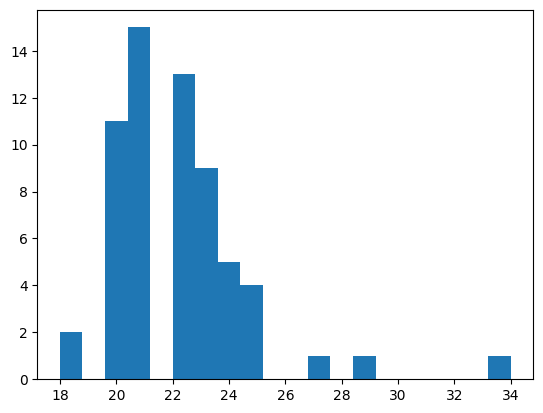

In [18]:
import matplotlib.pyplot as plt
pt = df.toPandas()['Age']
plt.hist(pt,bins=20)
plt.show()